In [57]:
#Brayan Steven León Martinez - Taller 20 - Matemáticas Computacional
from math import sqrt
import copy
import matplotlib.pyplot as plt
x=[1,3,5,7,9,11,13]
y=[7.4,1.8,-1,-1.8,-1.2,2.2,7.2]
n=len(x)

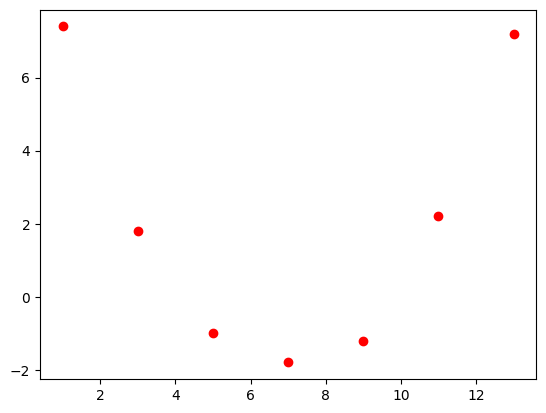

In [58]:
plt.plot(x, y, 'ro')
plt.show()

In [59]:
highx2 = []
highx3 = []
highx4 = []
multxy = []
highx2multx = []
for i in range(n):
    highx2.append(x[i]**2)
    highx3.append(x[i]**3)
    highx4.append(x[i]**4)
    multxy.append(x[i]*y[i])
    highx2multx.append((x[i]**2)*y[i])

In [60]:
sumatoria_x=sum(x)
sumatoria_y=sum(y)
sumatoria_highx2=sum(highx2)
sumatoria_highx3=sum(highx3)
sumatoria_highx4=sum(highx4)
sumatoria_multxy=sum(multxy)
sumatoria_highx2multx=sum(highx2multx)
promedio_y=sumatoria_y/n

In [61]:
a = [[n, sumatoria_x, sumatoria_highx2], [sumatoria_x, sumatoria_highx2, sumatoria_highx3], [sumatoria_highx2, sumatoria_highx3, sumatoria_highx4]]
b = [sumatoria_y, sumatoria_multxy, sumatoria_highx2multx]
matrizGauss = gaussJordan(a, b)

Matriz inicial
7 49 455 | 14.600000000000001
49 455 4753 | 102.20000000000002
455 4753 52871 | 1296.2

pivote: 7, i: 0
División
1.0 7.0 65.0 | 2.085714285714286
49 455 4753 | 102.20000000000002
455 4753 52871 | 1296.2

Reducción
1.0 7.0 65.0 | 2.085714285714286
0.0 112.0 1568.0 | 1.4210854715202004e-14
0.0 1568.0 23296.0 | 347.19999999999993

pivote: 112.0, i: 1
División
1.0 7.0 65.0 | 2.085714285714286
0.0 1.0 14.0 | 1.2688263138573217e-16
0.0 1568.0 23296.0 | 347.19999999999993

Reducción
1.0 0.0 -33.0 | 2.085714285714285
0.0 1.0 14.0 | 1.2688263138573217e-16
0.0 0.0 1344.0 | 347.1999999999997

pivote: 1344.0, i: 2
División
1.0 0.0 -33.0 | 2.085714285714285
0.0 1.0 14.0 | 1.2688263138573217e-16
0.0 0.0 1.0 | 0.25833333333333314

Reducción
1.0 0.0 0.0 | 10.610714285714279
0.0 1.0 0.0 | -3.616666666666664
0.0 0.0 1.0 | 0.25833333333333314



In [62]:
a0=matrizGauss[0]
a1=matrizGauss[1]
a2=matrizGauss[2]
print("a0: " + str(a0))
print("a1: " + str(a1))
print("a2: " + str(a2))

a0: 10.610714285714279
a1: -3.616666666666664
a2: 0.25833333333333314


In [63]:
print("y: " + str(a0) + " + " + str(a1) + "x + " + str(a2) + "x^2")

y: 10.610714285714279 + -3.616666666666664x + 0.25833333333333314x^2


In [64]:
stArray = []
srArray = []
for i in range(n):
    stArray.append((y[i]-promedio_y)**2)
    srArray.append((y[i]-a0-a1*x[i]-a2*x[i]**2)**2)

In [65]:
st=sum(stArray)
sr=sum(srArray)
print("St: " + str(st))
print("Sr: " + str(sr))

St: 89.90857142857143
Sr: 0.2152380952380939


In [66]:
coef = sqrt((st-sr)/st)*100
print("Coef. Correlación: " + str(coef))

Coef. Correlación: 99.8802299578171


In [67]:
ry=[]
for i in range(n):
    ry.append(a0 + (a1*x[i]) + (a2*x[i]**2))

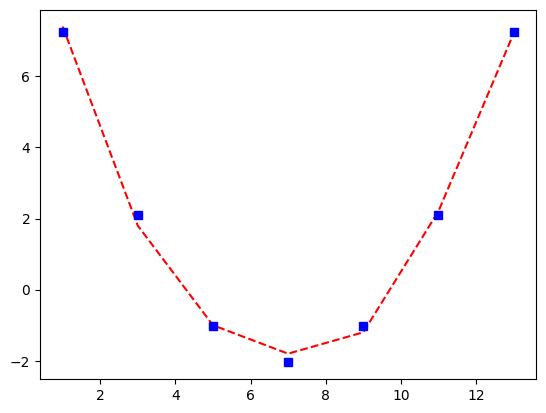

In [68]:
plt.plot(x, y, 'r--', x, ry, 'bs')
plt.show()

In [17]:
def imprimirSistema(a, b, etiqueta):
    n = len(b)
    print(etiqueta)
    for i in range(n):
        for j in range(n):
            print(a[i][j], end = " ")
        print("|", b[i])
    print()

In [18]:
def gaussJordan(ao, bo):
    a = copy.deepcopy(ao)
    b = copy.copy(bo)

    n = len(b)
    imprimirSistema(a, b, "Matriz inicial")
    for i in range(n):
        pivote = a[i][i]
        if(pivote == 0):
            for j in range(i+1, n):
                pivoteCorreccion = a[j][i]
                if(pivoteCorreccion != 0):
                    tempA = a[j]
                    tempB = b[j]
                    a[j] = a[i]
                    b[j] = b[i]
                    a[i] = tempA
                    b[i] = tempB
                    break
        pivote = a[i][i]
        print("pivote: " + str(pivote) + ", i: " + str(i))
        #Dividir por el pivote
        for j in range(n):
            a[i][j] /= pivote
        b[i] /= pivote
        imprimirSistema(a, b, "División")

        #Reducción
        for k in range(n):
            if i != k:
                #Se reduce
                valorAux = -a[k][i]
                for j in range(n):
                    a[k][j] += a[i][j] * valorAux
                b[k] += b[i] * valorAux
        imprimirSistema(a, b, "Reducción")

    return b